In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
url  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR.csv"
data = pd.read_csv(url)

In [27]:
data = data.replace({"-": 0})         ##Reemplazamos los valores -  con un 0
data = data.replace(np.nan, 0)        ##Reemplazamos los valores no existentes con un 0

In [28]:
for col in data.columns:              ## Cambiamos el tipo de data
    if col != "Region" and col != "Poblacion":
        data[col] = data[col].astype(int)

## Mostramos la Información entregada por el ministerios de Ciencia
* Los valores que están en 0 fueron transformados desde valores no entregados como "-" o NaN. Para un mejor trabajo de los datos. EN NINGUN CASO SIGNIFICA QUE EN ESOS DIAS SE HICIERON 0 TEST POR REGIÓN.

In [29]:
data

,Region,Codigo region,Poblacion,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,...,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08
0,Arica y Parinacota,15,252110,70,0,93,103,0,93,24,...,61,84,124,87,41,89,86,77,123,92
1,Tarapacá,1,382773,0,0,0,0,0,0,0,...,111,124,8,102,90,90,123,53,221,169
2,Antofagasta,2,691854,182,128,107,175,103,95,117,...,198,259,164,312,271,231,182,236,247,291
3,Atacama,3,314709,57,52,60,25,20,22,25,...,112,107,114,105,75,70,111,107,164,167
4,Coquimbo,4,836096,0,0,0,0,0,0,0,...,74,78,166,165,102,191,0,23,51,59
5,Valparaíso,5,1960170,301,249,248,273,223,92,385,...,169,278,450,327,251,196,233,268,690,573
6,Metropolitana,13,8125072,5383,3185,2105,3861,1850,1656,2694,...,4349,5282,6144,6922,4570,5631,5509,6920,8382,7839
7,O’Higgins,6,991063,68,0,74,0,74,30,30,...,105,111,94,181,63,72,214,174,68,150
8,Maule,7,1131939,397,219,0,341,113,160,0,...,58,249,187,339,302,322,267,135,93,181
9,Ñuble,16,511551,364,0,259,189,65,0,0,...,104,120,129,101,97,69,0,213,171,110


## Cantidad de tests totales realizados a lo largo del tiempo en el pais

In [30]:
fechas = data.columns[(data.columns != 'Region') & (data.columns != 'Poblacion') & (data.columns != "Codigo region")]

In [31]:
X = []
Y = []
for fecha in fechas:
    total = data[fecha].sum()
    Y.append(total)
    X.append(fecha)

In [32]:
def labelonbars(X, Y):
    n = len(X)
    for i in range (n):
        number = '{:,}'.format(int(Y[i])).replace(',', '.')
        plt.annotate(
            number, xy=(X[i], Y[i]),
            xytext =(0, 1),
            textcoords="offset points",
            ha ='center', va='bottom')

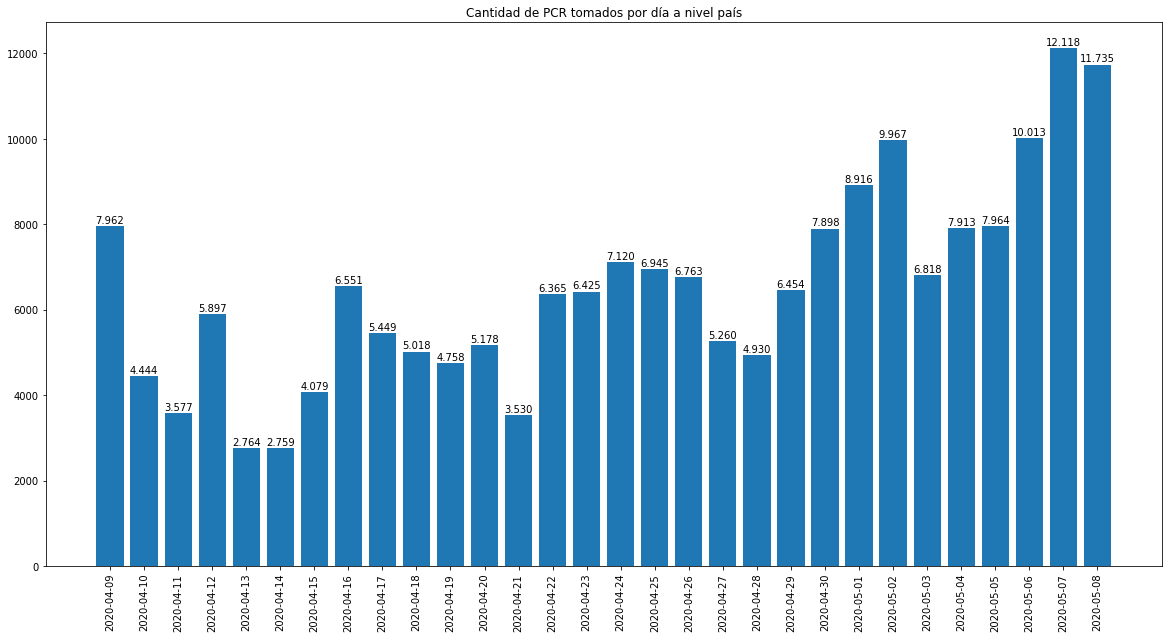

In [33]:
plt.figure(figsize=(20,10))
plt.bar(X,Y)
plt.xticks(X, rotation='vertical')
plt.title("Cantidad de PCR tomados por día a nivel país")
labelonbars(X, Y)
plt.show()

## Cantidad total de test por región

In [34]:
total_por_region =  data[fechas].sum(axis=1).to_list()
Y                =  total_por_region
X                =  data["Region"].to_list()

In [35]:
def labelonbars(X, Y):
    n = len(X)
    for i in range (n):
        number = '{:,}'.format(int(Y[i])).replace(',', '.')
        plt.annotate(
            number, xy=(Y[i], X[i]),
            xytext =(25, -5),
            textcoords="offset points",
            ha ='center', va='bottom')

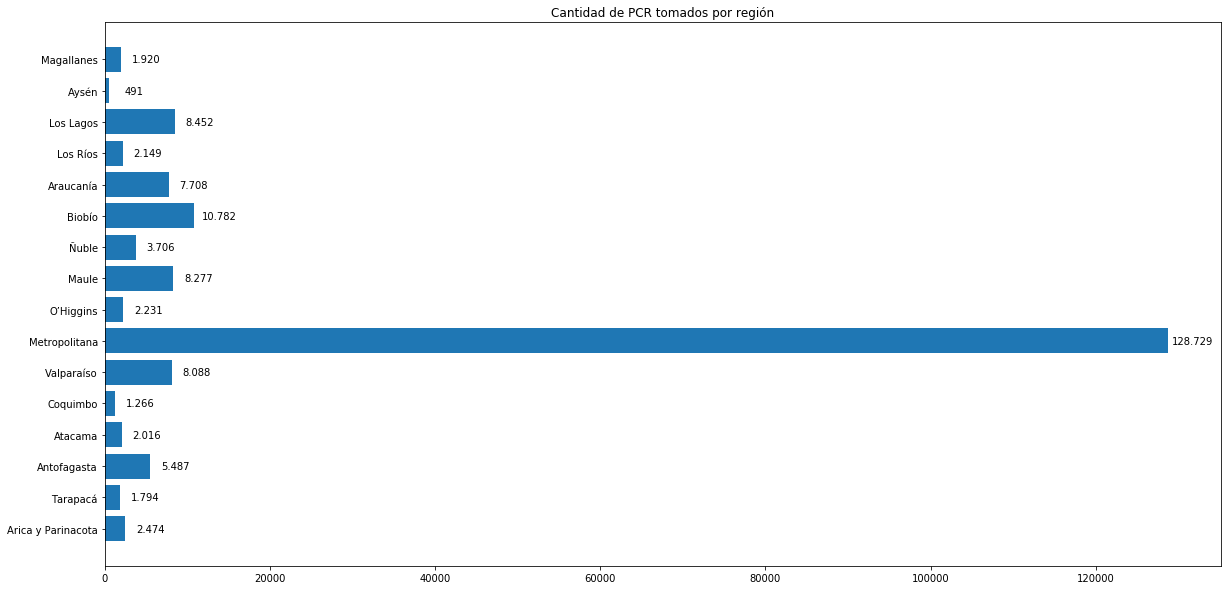

In [36]:
plt.figure(figsize=(20,10))
plt.barh(X,Y)
plt.title("Cantidad de PCR tomados por región")
labelonbars(X, Y)
plt.show()

## Porcentaje de test positivos por día

### Creamos el dataframe de |fecha | PCRS|

In [37]:
pcr_totales = data[fechas].sum().values.tolist()

In [38]:
df_pcr_totales = pd.DataFrame({
                                'Fecha': fechas,
                                'PCRS': pcr_totales
                                })

In [39]:
df_pcr_totales.tail(5)

,Fecha,PCRS
25,2020-05-04,7913
26,2020-05-05,7964
27,2020-05-06,10013
28,2020-05-07,12118
29,2020-05-08,11735


### Creamos el dataframe |Fecha|Cantidad de positivos|

In [40]:
url        = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/TotalesNacionales.csv"
data_total = pd.read_csv(url)
positivos  = data_total[data_total["Fecha"] == "Casos nuevos totales"]
positivos

,Fecha,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,...,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08
6,Casos nuevos totales,0.0,2.0,1.0,1.0,2.0,3.0,5.0,2.0,6.0,...,770,888,985,1427,1228,980,1373,1032,1533,1391


In [41]:
fecha_positivos = positivos.columns[1:]
test_positivos  = positivos.values.tolist()[0][1:]
df_positivos    = pd.DataFrame({
                                'Fecha': fecha_positivos,
                                'Positivos': test_positivos
                                })

In [42]:
df_positivos.tail(5)

,Fecha,Positivos
62,2020-05-04,980.0
63,2020-05-05,1373.0
64,2020-05-06,1032.0
65,2020-05-07,1533.0
66,2020-05-08,1391.0


### Unimos los dataframe

In [43]:
df = pd.merge(df_pcr_totales, df_positivos, on='Fecha')

In [44]:
df["Porcentaje de positivos"] = ((df["Positivos"]*100) / df["PCRS"])

In [45]:
df.tail(5)

,Fecha,PCRS,Positivos,Porcentaje de positivos
25,2020-05-04,7913,980.0,12.384683
26,2020-05-05,7964,1373.0,17.240080
27,2020-05-06,10013,1032.0,10.306601
28,2020-05-07,12118,1533.0,12.650602
29,2020-05-08,11735,1391.0,11.853430


## Porcentaje de test positivos a lo largo del tiempo

In [46]:
X = df["Fecha"].values.tolist()
Y = df["Porcentaje de positivos"].values.tolist()

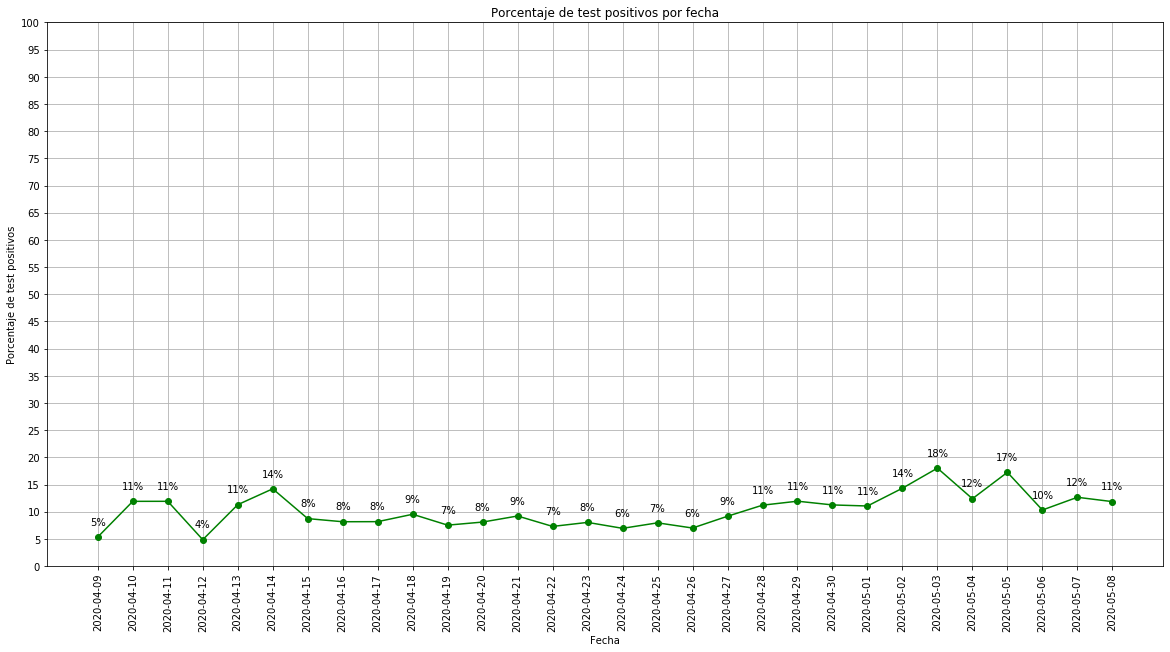

In [47]:
def labelonbars(X, Y):
    n = len(X)
    for i in range (n):
        number = '{:,}'.format(int(Y[i])).replace(',', '.')
        number = str(number) + "%"
        plt.annotate(
            number, xy=(X[i], Y[i]),
            xytext =(0, 10),
            textcoords="offset points",
            ha ='center', va='bottom')
        
plt.figure(figsize=(20,10))
plt.plot(X, Y, 'go-')
labelonbars(X, Y)
plt.xlabel('Fecha')
plt.ylabel("Porcentaje de test positivos")
plt.title("Porcentaje de test positivos por fecha")
plt.grid()
plt.xticks(X, rotation='vertical')
plt.yticks(np.arange(0, 105, 5))
plt.show()

### Testo tomados vs test positivos

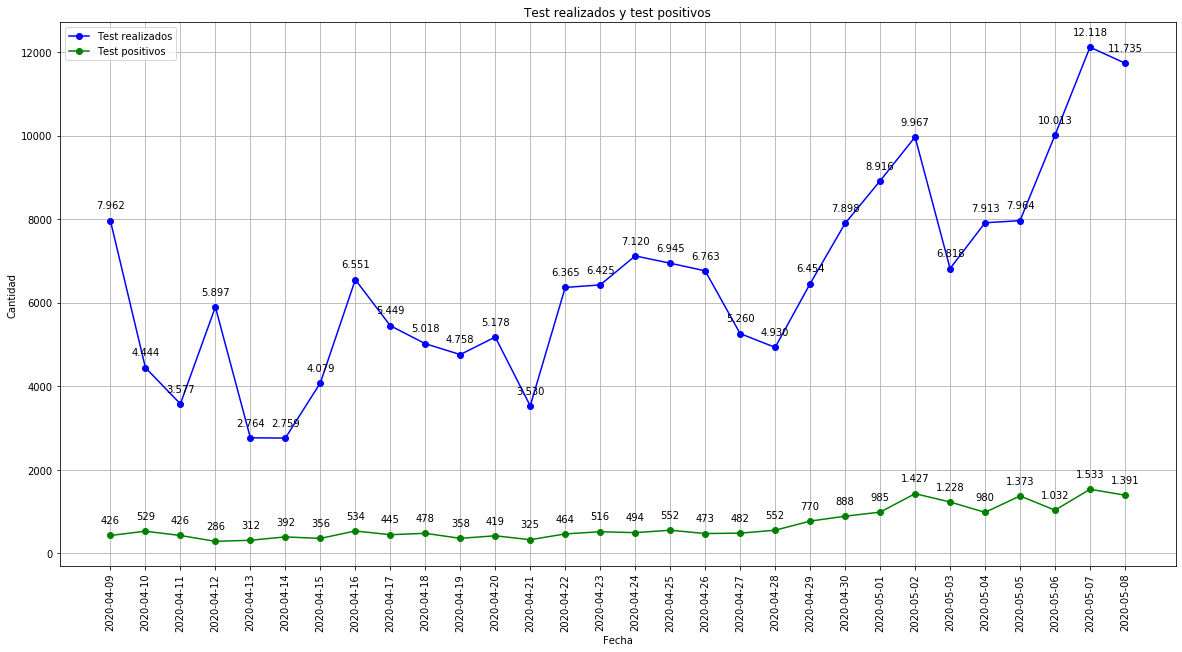

In [48]:
def labelonbars(X, Y):
    n = len(X)
    for i in range (n):
        number = '{:,}'.format(int(Y[i])).replace(',', '.')
        number = str(number)
        plt.annotate(
            number, xy=(X[i], Y[i]),
            xytext =(0, 10),
            textcoords="offset points",
            ha ='center', va='bottom')
        
plt.figure(figsize=(20,10))
plt.plot(df["Fecha"], df["PCRS"], 'bo-')
labelonbars(df["Fecha"], df["PCRS"])

plt.plot(df["Fecha"], df["Positivos"], 'go-')
labelonbars(df["Fecha"], df["Positivos"])

plt.xlabel('Fecha')
plt.ylabel("Cantidad")
plt.title("Test realizados y test positivos")
plt.grid()
plt.xticks(df["Fecha"], rotation='vertical')
plt.legend(["Test realizados", "Test positivos"])
plt.show()